In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../data/train.csv")
print(train.shape)
train.Embarked.value_counts()

(891, 12)


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [2]:
test_data = pd.read_csv("../data/test.csv")
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Some quick statistics on dataset

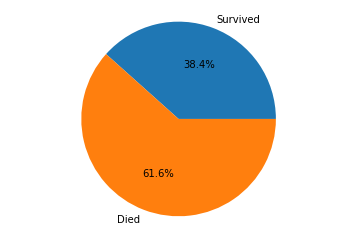

In [4]:
survived = len(train.loc[train.Survived == 1])
total = len(train)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Survived', 'Died'
sizes = [survived, total-survived]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig("../img/survive_ratio.png")
plt.show()




In [ ]:
women = train.loc[train.Sex == 'female']["Survived"]
men = train.loc[train.Sex == 'male']["Survived"]

# creating the dataset
labels = ['Female', 'Men']
ratios = [sum(women)/len(women), sum(men)/len(men)]
ratios_fmt = ["{:.2%}".format(val) for val in ratios]
  
fig = plt.figure(figsize = (6, 4))
bars = plt.bar(labels, ratios, color ='lightblue', width = 0.4)
for i in range(len(size)):
    plt.text(i, ratios[i], ratios_fmt[i], ha = 'center')

# plt.xlabel("Ratio surviver by gender")
plt.ylabel("Percentage")
plt.title("Surviving Ratio by gender")
plt.savefig("../img/surviving_rate_by_gender.png", dpi=100)

1000
group
18-30    23.654971
30-50    40.189922
50-99    75.028021
Name: age, dtype: float64


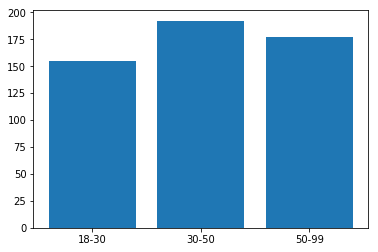

In [49]:
from data_visualization import *

N = 1000
df = pd.DataFrame({'age': np.random.randint(18, 99, N),
                   'revenue': 20 + 200*np.abs(np.random.randn(N))})


df['group'] = pd.cut(df['age'], bins = [18, 30, 50, 99], include_lowest = True, labels = ['18-30', '30-50', '50-99'])
print(len(df['age']))
df = df.groupby(by = 'group').mean()

print((df['age']))
fig, ax = plt.subplots()

ax.bar(x = df.index, height = df['revenue'])

plt.show()




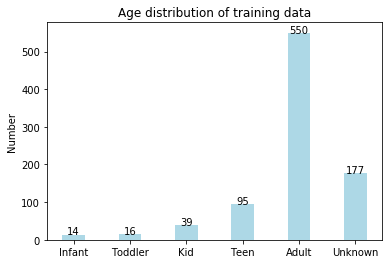

In [125]:
bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']

age_groups = pd.cut(train['Age'], bins=bins, labels=labels, right=False, retbins=True)

data = {l : 0 for l in labels}
data["Unknown"] = age_groups[0].size - age_groups[0].count()
for _, value in age_groups[0].dropna().items():
    data[value] += 1


# creating the dataset
labels = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 4))
bars = plt.bar(labels, values, color ='lightblue', width = 0.4)
for i in range(len(values)):
    plt.text(i, values[i], values[i], ha = 'center')

# plt.xlabel("Ratio surviver by gender")
plt.ylabel("Number")
plt.title("Age distribution of training data")
plt.savefig("../img/age_distribution.png", dpi=100)

{'Adult': 211, 'Infant': 12, 'Kid': 20, 'Teen': 39, 'Toddler': 8, 'Unknown': 52}
{'Adult': 339, 'Infant': 2, 'Kid': 19, 'Teen': 56, 'Toddler': 8, 'Unknown': 125}


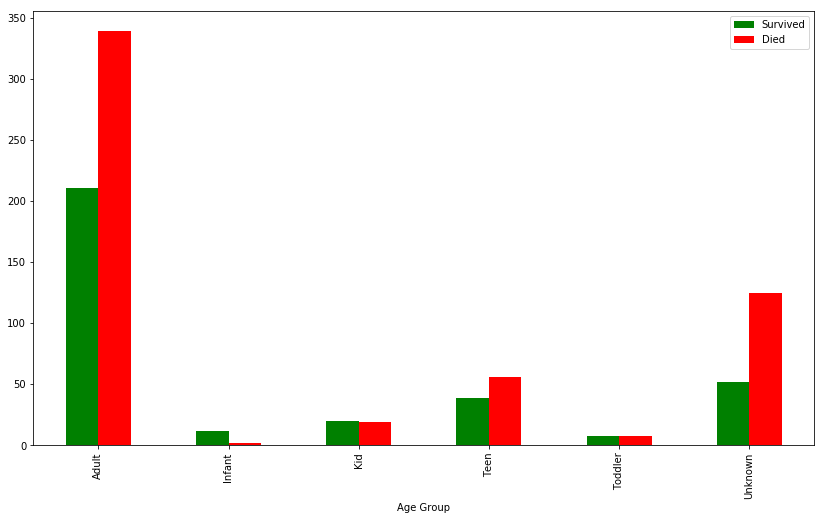

In [189]:
bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']

age_groups = pd.cut(train['Age'], bins=bins, labels=labels, right=False, retbins=True)[0]
train['AgeGroup'] = age_groups
train['AgeGroup'].replace(np.nan, 'Unknown', inplace=True)

groupByAge = train.groupby('AgeGroup')
survival = groupByAge['Survived'].value_counts()
survivedData = {}
diedData = {}
for l, v in survival.items():
    if l[1] == 0:
        diedData[l[0]] = v
    else:
        survivedData[l[0]] = v

print(survivedData)
print(diedData)

df = pd.DataFrame({
    'Age Group' : list(survivedData.keys()),
    'Survived' : list(survivedData.values()),
    'Died' : list(diedData.values())
})
fig = df.plot(x="Age Group", y=["Survived", "Died"], color=["g","r"], kind="bar", figsize=(14, 8)).get_figure()
fig.savefig("../img/survive_vs_dead_by_age_greoup.png")

# ages = train['AgeGroup'].value_counts()
# ages['Adult']

In [207]:
fil = train.isna()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [21]:
import util

filename = "../data/train.csv"

train, valid, test = util.load_data(filename)
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     711 non-null    int64   
 1   Survived        711 non-null    int64   
 2   Pclass          711 non-null    object  
 3   Name            711 non-null    object  
 4   Sex             711 non-null    object  
 5   Age             563 non-null    float64 
 6   SibSp           711 non-null    int64   
 7   Parch           711 non-null    int64   
 8   Ticket          711 non-null    object  
 9   Fare            711 non-null    float64 
 10  Cabin           169 non-null    object  
 11  Embarked        711 non-null    object  
 12  AgeGroup        563 non-null    category
 13  name_title      711 non-null    object  
 14  cabin_multiple  711 non-null    int64   
 15  cabin_adv       711 non-null    object  
 16  numeric_ticket  711 non-null    int64   
dtypes: category(1), 

In [22]:
import util

In [1]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'